# $t\bar{t}$ min_dR

**Motivation:** We had these very nice results with looking at $t\bar{t}$ for pairAGraph back when I was trying to get flows to work, so I wanted to investigate the import here as well as I was about to split up the modelling regions by $\Delta \eta_{hh}$.

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path+= ['../RRevolution/code/','../PAG-opt/','../code/']
from analysis import getXhh
from utils import mcToYr, L

from eventDisplays import rainbow_text

from plots import draw_SR, draw_VR, draw_CR

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Load in the data**

In [5]:
yr = 17
mc = 'mc16d'

In [16]:
rrDir = '../../hh4b/hh4b-resolved-reconstruction/'
tName = 'fullmassplane'

tcols = ['ntag','mc_sf','m_h1','m_h2','njets','pt_hh','X_wt_tag','m_hh',
         'dEta_hh','pass_vbf_sel','passMuonIso'] 

if '4.' in uproot.__version__:
    ah = uproot.open(f'{rrDir}/allhad_{mc}_merge.root')[tName].arrays(tcols,library='pd')
    sl = uproot.open(f'{rrDir}/semilep_{mc}_merge.root')[tName].arrays(tcols,library='pd')
else:    
    ah = uproot.open(f'{rrDir}/allhad_{mc}_merge.root')[tName].pandas.df(tcols)
    sl = uproot.open(f'{rrDir}/semilep_{mc}_merge.root')[tName].pandas.df(tcols)
    
for df in [ah,sl]:
    df['mc_sf'] *= L[yr]

### Step 1: Massplanes

In [8]:
x0,y0 = 120,110
x1,y1 = 124,117

In [9]:
prodTag='MAR20'

In [10]:
# fmp = "$\mathbf{ATLAS}$ Simulation Internal\n"
# fmp += f"{mc}, {prodTag} MNT\n"
# fmp += "min_dR, X_wt_tag, res bkts"

fmp = "$\mathbf{ATLAS}$ Simulation Internal\n"
fmp += f"{mc}, {prodTag} MNT\n"
fmp += "min_dR, pre X_wt, NR bkts"

In [11]:
for physicsSample in ['allhad','semilep']:
    figDir = f'figures/{physicsSample}_{mc}-{prodTag}/'
    if not os.path.exists(figDir):
        os.mkdir(figDir)
    figDir += 'min_dR_nr_bkts'
    if not os.path.exists(figDir):
        os.mkdir(figDir)

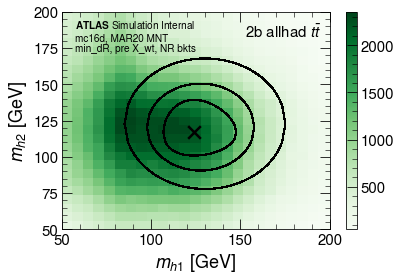

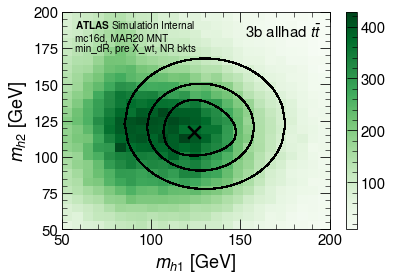

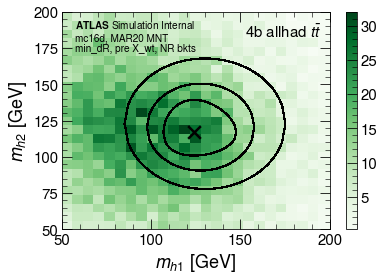

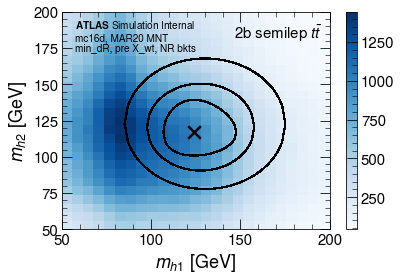

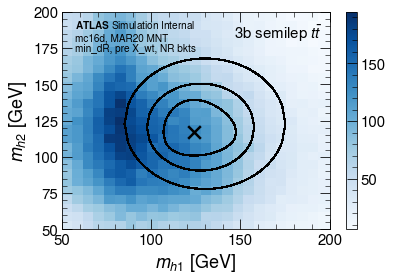

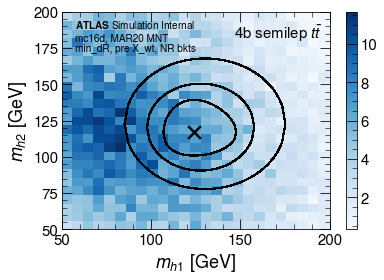

In [12]:
for physicsSample,df, cmap in zip(['allhad','semilep'],[ah,sl],
                                  ['Greens','Blues']):
    
    figDir = f'figures/{physicsSample}_{mc}-{prodTag}/min_dR'
    
    for ntag in [2,3,4]:
        if ntag==4:
            m = (df.ntag>=4) & (~df.pass_vbf_sel)
        else:
            m = (df.ntag==ntag) & (~df.pass_vbf_sel)

        plt.figure()
        plt.hist2d(*df.loc[m,['m_h1','m_h2']].values.T,25,[(50,200),(50,200)],
                   cmap=cmap,weights=df.loc[m,'mc_sf'])
        plt.colorbar()
        plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
        plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

        ax = plt.gca()
        plt.text(0.97,0.95, f'{ntag}b {physicsSample} '+r"$t\bar{t}$",
                 transform=ax.transAxes, ha='right',va='top',fontsize=15)
        plt.text(0.05,0.97,fmp,transform=ax.transAxes,ha='left',va='top',fontsize=10)

        # Overlay our region definitions
        c = 'k'
        plt.scatter([x1],[y1],160,marker='x',color=c)
        for f in [draw_SR,draw_VR,draw_CR]:
            x,y = f(x1,y1)
            plt.plot(x,y,c,lw=1.2)

        plt.savefig(f'{figDir}/mp_{ntag}b_sr_{x1}_{y1}.pdf', bbox_inches='tight')

Then Rafael wanted me to look @ these in jet multiplicity bins too!!

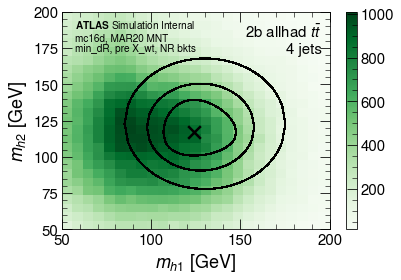

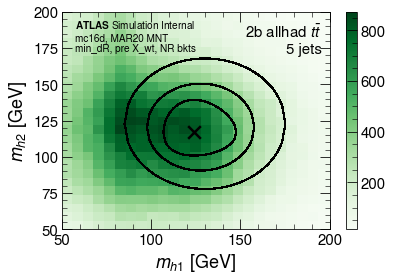

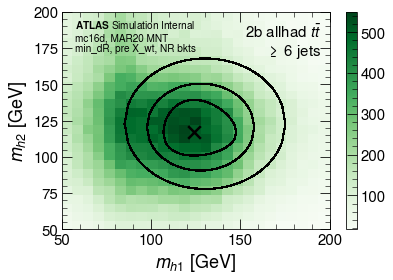

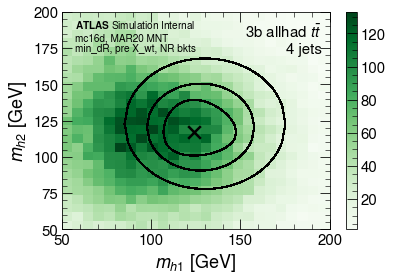

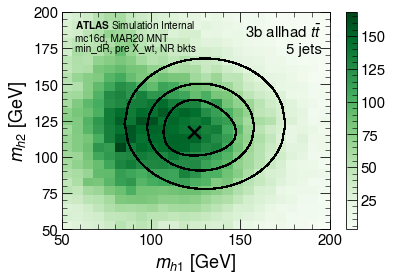

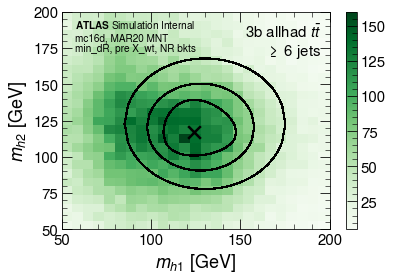

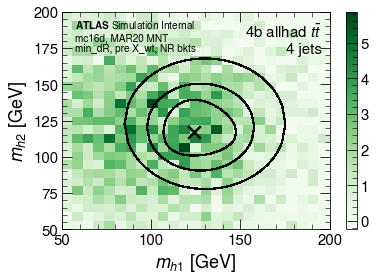

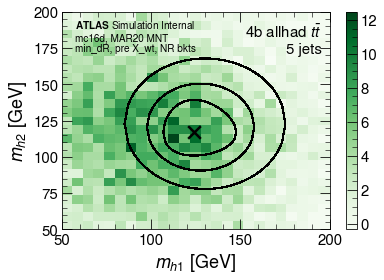

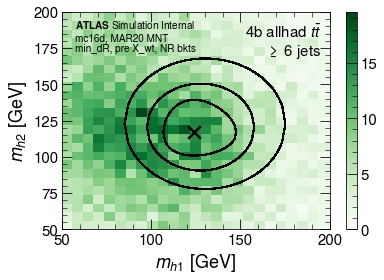

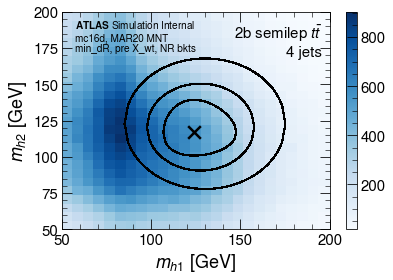

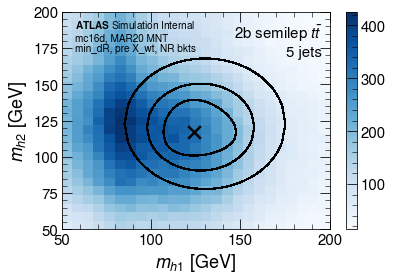

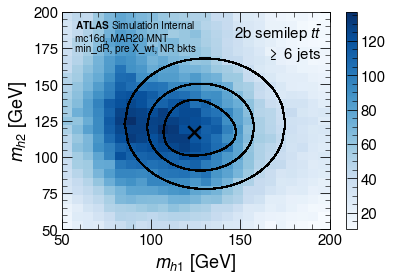

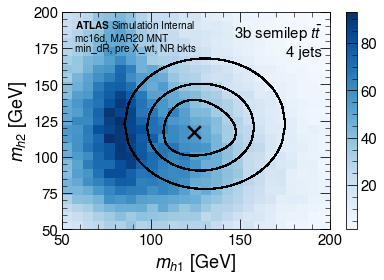

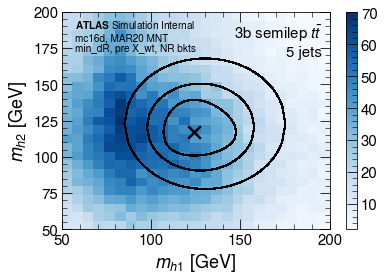

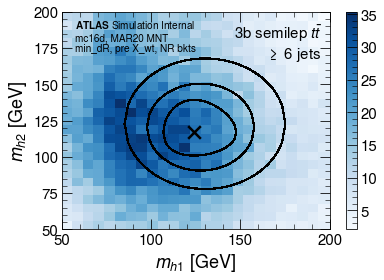

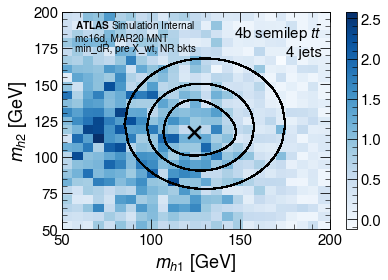

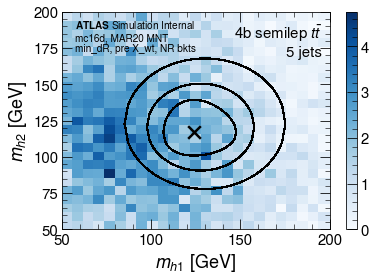

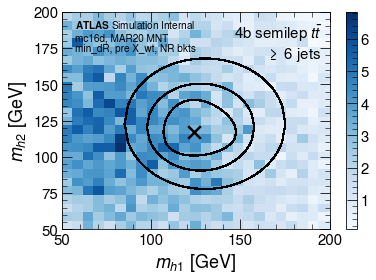

In [13]:
for physicsSample,df, cmap in zip(['allhad','semilep'],[ah,sl],
                                  ['Greens','Blues']):
    
    figDir = f'figures/{physicsSample}_{mc}-{prodTag}/min_dR'
    
    for ntag in [2,3,4]:
        
        for njets in [4,5,6]:
            if ntag==4:
                m = (df.ntag>=4) & (~df.pass_vbf_sel)
            else:
                m = (df.ntag==ntag) & (~df.pass_vbf_sel)

            title = f'{ntag}b {physicsSample} '+r"$t\bar{t}$"
        
            if njets ==6:
                m = m & (df.njets >= 6)
                title += '\n$\geq$ 6 jets'
            else: 
                m= m & (df.njets==njets)
                title += f'\n{njets} jets'
                
                
            plt.figure()
            plt.hist2d(*df.loc[m,['m_h1','m_h2']].values.T,25,[(50,200),(50,200)],
                       cmap=cmap,weights=df.loc[m,'mc_sf'])
            plt.colorbar()
            plt.xlabel('$m_{h1}$ [GeV]',fontsize=18)
            plt.ylabel('$m_{h2}$ [GeV]',fontsize=18)

            ax = plt.gca()
            plt.text(0.97,0.95, title, transform=ax.transAxes, ha='right',va='top')
            plt.text(0.05,0.97,fmp,transform=ax.transAxes,ha='left',va='top',fontsize=10)

            # Overlay our region definitions
            c = 'k'
            plt.scatter([x1],[y1],160,marker='x',color=c)
            for f in [draw_SR,draw_VR,draw_CR]:
                x,y = f(x1,y1)
                plt.plot(x,y,c,lw=1.2)

            plt.savefig(f'{figDir}/mp_{ntag}b_{njets}jets_sr_{x1}_{y1}.pdf', bbox_inches='tight')

**Sanity check I'm saving `passMuonIso` appropriately** 

In [15]:
ah.columns

Index(['ntag', 'mc_sf', 'm_h1', 'm_h2', 'njets', 'pT_4', 'pT_2', 'dRjj_1',
       'dRjj_2', 'eta_i', 'pt_hh', 'X_wt_tag', 'm_hh', 'dEta_hh', 'phi_h1',
       'phi_h2', 'pass_vbf_sel'],
      dtype='object')

In [22]:
np.mean(ah.passMuonIso*ah.mc_sf)/np.sum(ah.mc_sf)

5.1021156e-11

In [21]:
np.sum(sl.passMuonIso*sl.mc_sf) / np.sum(sl.mc_sf)

0.18298207

### Step 2: Jet multiplicity dependence for $X_{wt}$